In [1]:
# Імпортуємо бібліотеки 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# для вирішення задачі показу графіків
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Додатково
# для попереджень
import warnings
warnings.filterwarnings('ignore')
# для кращої візуалізації графіків
plt.style.use('_mpl-gallery')
FONT = {'fontsize':20, 'fontstyle':'normal', 'fontfamily':'Times New Roman', 'backgroundcolor':'#191919', 'color':'white'} # для назви графіків

In [3]:
# імпортуємо обов'язкові sklearn функції
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss

In [4]:
data = pd.read_csv('D:/Education/Programming/University/bank_loan.csv')

In [5]:
data.head(5)

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
0   1   25           1      49     91108       4  1/60          1         0   
1   2   45          19      34     90089       3  1/50          1         0   
2   3   39          15      11     94720       1  1/00          1         0   
3   4   35           9     100     94112       1  2/70          2         0   
4   5   35           8      45     91330       4  1/00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [7]:
data['CCAvg'] = data['CCAvg'].str.replace('/', '.').astype('float64')
data

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91108       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [8]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [9]:
pd.set_option('display.max_rows', 20)
round(data.describe().T, 2)

count      mean      std     min       25%      50%  \
ID                  5000.0   2500.50  1443.52     1.0   1250.75   2500.5   
Age                 5000.0     45.34    11.46    23.0     35.00     45.0   
Experience          5000.0     20.10    11.47    -3.0     10.00     20.0   
Income              5000.0     73.77    46.03     8.0     39.00     64.0   
ZIP Code            5000.0  93152.50  2121.85  9307.0  91911.00  93437.0   
Family              5000.0      2.40     1.15     1.0      1.00      2.0   
CCAvg               5000.0      1.94     1.75     0.0      0.70      1.5   
Education           5000.0      1.88     0.84     1.0      1.00      2.0   
Mortgage            5000.0     56.50   101.71     0.0      0.00      0.0   
Personal Loan       5000.0      0.10     0.29     0.0      0.00      0.0   
Securities Account  5000.0      0.10     0.31     0.0      0.00      0.0   
CD Account          5000.0      0.06     0.24     0.0      0.00      0.0   
Online              5000.0      0.60     0.49     0.0      0.00      1.0   
CreditCard          5000.0      0.29     0.46     0.0      0.00      0.0   

                         75%      max  
ID                   3750.25   5000.0  
Age                    55.00     67.0  
Experience             30.00     43.0  
Income                 98.00    224.0  
ZIP Code            94608.00  96651.0  
Family                  3.00      4.0  
CCAvg                   2.50     10.0  
Education               3.00      3.0  
Mortgage              101.00    635.0  
Personal Loan           0.00      1.0  
Securities Account      0.00      1.0  
CD Account              0.00      1.0  
Online                  1.00      1.0  
CreditCard              1.00      1.0

In [10]:
# знаходимо від’ємні значення у зміннії Experience
data[data['Experience'] < 0]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89      90   25          -1     113     94303       4   2.30          3   
226    227   24          -1      39     94085       2   1.70          2   
315    316   24          -2      51     90630       3   0.30          3   
451    452   28          -2      48     94132       2   1.75          3   
524    525   24          -1      75     93014       4   0.20          1   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4411  4412   23          -2      75     90291       2   1.80          2   
4481  4482   25          -2      35     95045       4   1.00          3   
4514  4515   24          -3      41     91768       4   1.00          3   
4582  4583   25          -1      69     92691       3   0.30          3   
4957  4958   29          -1      50     95842       2   1.75          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
89           0              0                   0           0       0   
226          0              0                   0           0       0   
315          0              0                   0           0       1   
451         89              0                   0           0       1   
524          0              0                   0           0       1   
...        ...            ...                 ...         ...     ...   
4411         0              0                   0           0       1   
4481         0              0                   0           0       1   
4514         0              0                   0           0       1   
4582         0              0                   0           0       1   
4957         0              0                   0           0       0   

      CreditCard  
89             1  
226            0  
315            0  
451            0  
524            0  
...          ...  
4411           1  
4481           0  
4514           0  
4582           0  
4957           1  

[52 rows x 14 columns]

In [11]:
data[data['Experience'] < 0] = data[data['Experience'] < 0].abs()
data

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91108       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [12]:
data.isna().sum().to_frame().T

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   0    0           0       0         0       0      0          0         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   0           0       0           0

In [13]:
for col in data:
    print(f"{col} has {data[col].nunique()} unique value")

ID has 5000 unique value
Age has 45 unique value
Experience has 44 unique value
Income has 162 unique value
ZIP Code has 468 unique value
Family has 4 unique value
CCAvg has 108 unique value
Education has 3 unique value
Mortgage has 347 unique value
Personal Loan has 2 unique value
Securities Account has 2 unique value
CD Account has 2 unique value
Online has 2 unique value
CreditCard has 2 unique value


In [14]:
discrete_cols1 = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in discrete_cols1:
    print(f"{col}:\n{data[col].value_counts()}")
    print('-' * 50)

Family:
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
--------------------------------------------------
Education:
1    2096
3    1501
2    1403
Name: Education, dtype: int64
--------------------------------------------------
Personal Loan:
0    4520
1     480
Name: Personal Loan, dtype: int64
--------------------------------------------------
Securities Account:
0    4478
1     522
Name: Securities Account, dtype: int64
--------------------------------------------------
CD Account:
0    4698
1     302
Name: CD Account, dtype: int64
--------------------------------------------------
Online:
1    2984
0    2016
Name: Online, dtype: int64
--------------------------------------------------
CreditCard:
0    3530
1    1470
Name: CreditCard, dtype: int64
--------------------------------------------------


In [15]:
data.duplicated().sum()

0

In [16]:
data.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
data

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

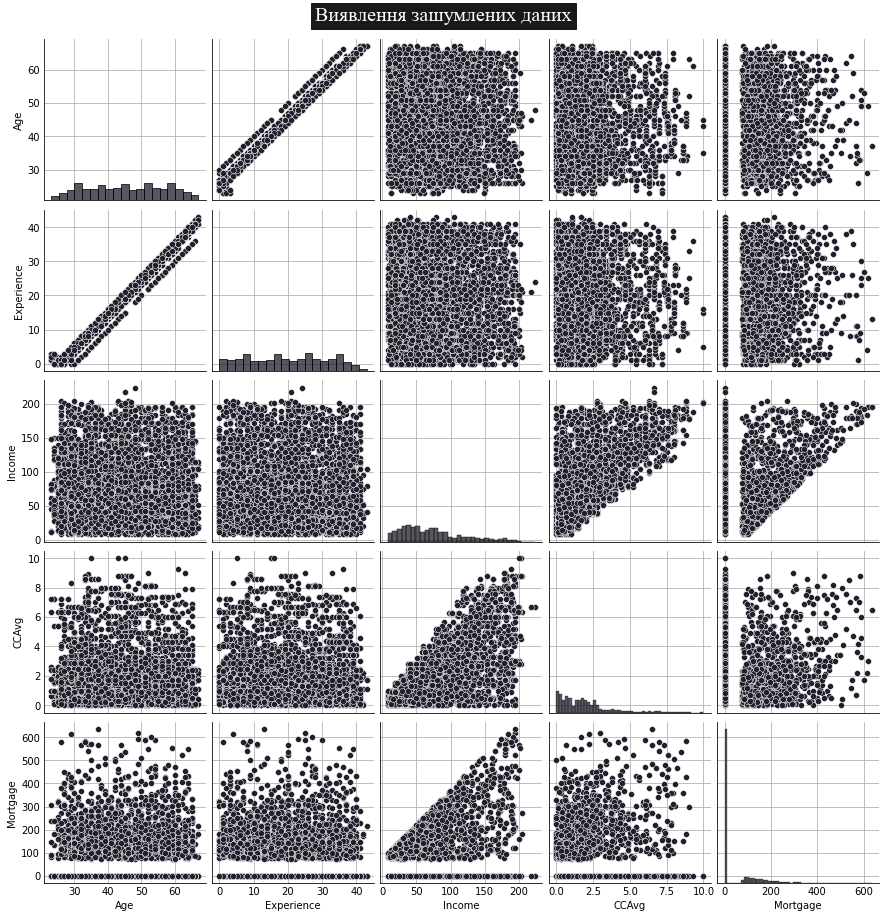

In [17]:
# Виявлення зашумлених даних
%matplotlib inline
sns.set_palette('bone')
dnp = sns.pairplot(data.loc[:, ~data.columns.isin(discrete_cols1)])
dnp.fig.suptitle('Виявлення зашумлених даних', y=1.02, **FONT)

plt.show()

In [18]:
fig = go.Figure()
for col in data:
    fig.add_trace(go.Box(x=data[col], name=col))
fig.update_layout(
    title_text="Бокс-плот викидів",
    title_font=dict(color='white', family='newtimeroman', size=25),
    title_x=0.45,
    paper_bgcolor='#191919',
    # plot_bgcolor='#DAF7A6',
    font=dict(color='white', family='newtimeroman', size=16),
    )
fig.show()

In [19]:
# переводимо річний дохід у місячний, розділивши на 12
data['Income'] = round(data['Income']/12, 2)


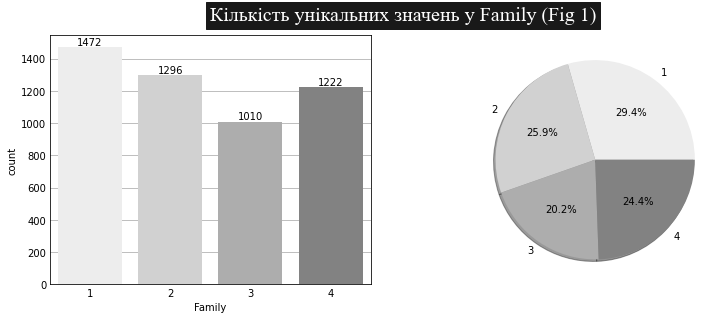

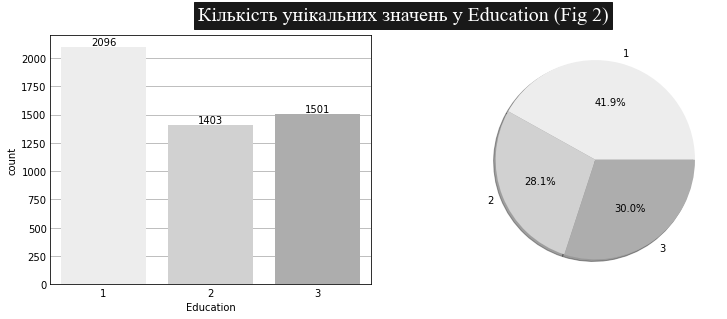

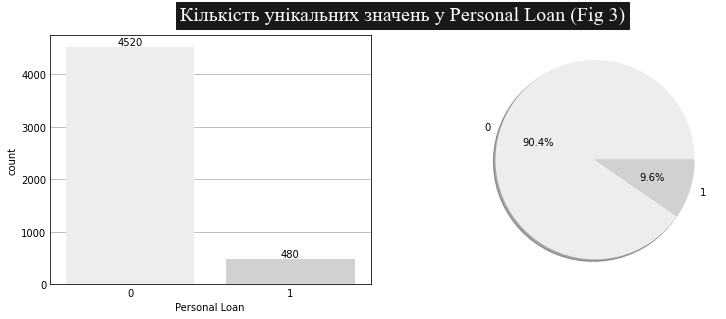

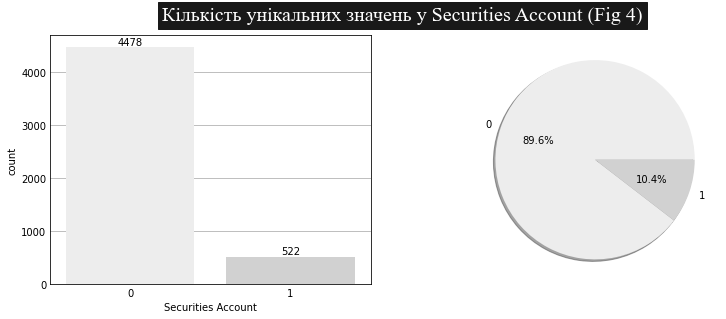

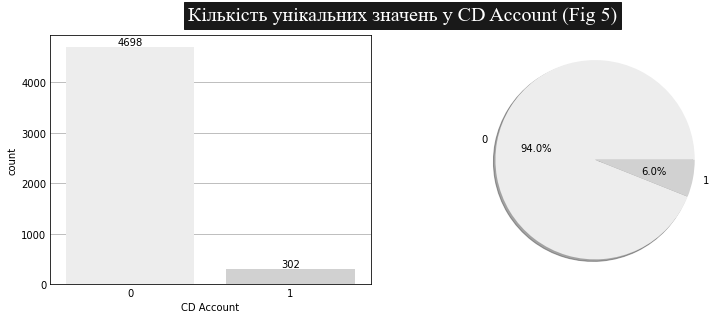

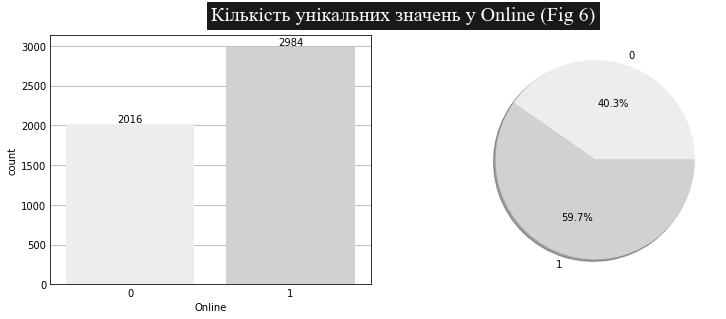

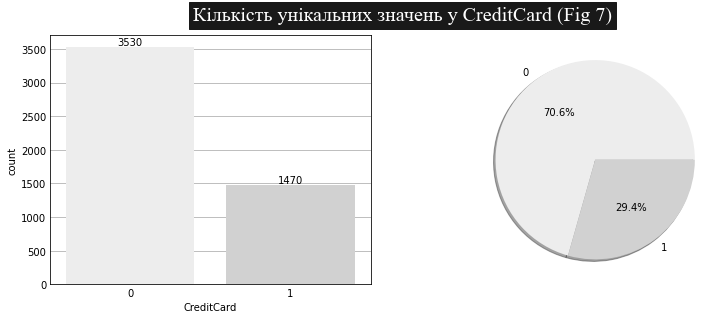

In [20]:
# однофакторний аналіз категоріальних даних:
sns.set_palette("Greys")
for i, col in enumerate(discrete_cols1):

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    sns.countplot(data=data, x=col, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
        
    slices = data[col].value_counts().sort_index().values
    activities = [var for var in data[col].value_counts().sort_index().index]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f'Кількість унікальних значень у {col} (Fig {i+1})', y=1.09, **FONT)
    plt.show()

In [21]:
# однофакторний аналіз числових даних:
data.loc[:, ~data.columns.isin(discrete_cols1)].describe().T

count       mean         std    min    25%    50%     75%     max
Age         5000.0  45.338400   11.463166  23.00  35.00  45.00   55.00   67.00
Experience  5000.0  20.134600   11.415189   0.00  10.00  20.00   30.00   43.00
Income      5000.0   6.147912    3.836233   0.67   3.25   5.33    8.17   18.67
CCAvg       5000.0   1.937938    1.747659   0.00   0.70   1.50    2.50   10.00
Mortgage    5000.0  56.498800  101.713802   0.00   0.00   0.00  101.00  635.00

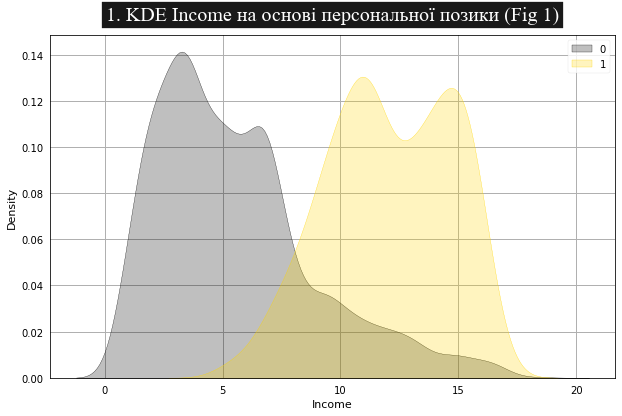

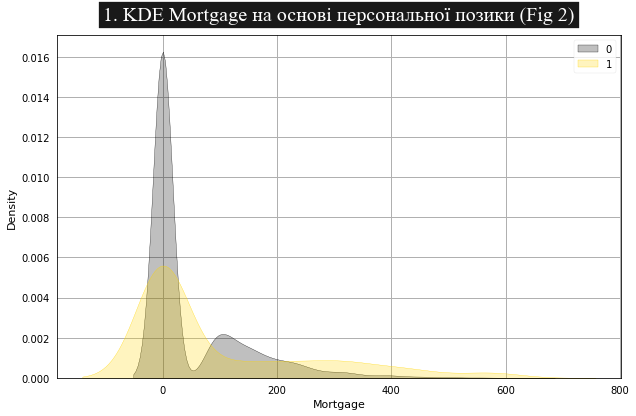

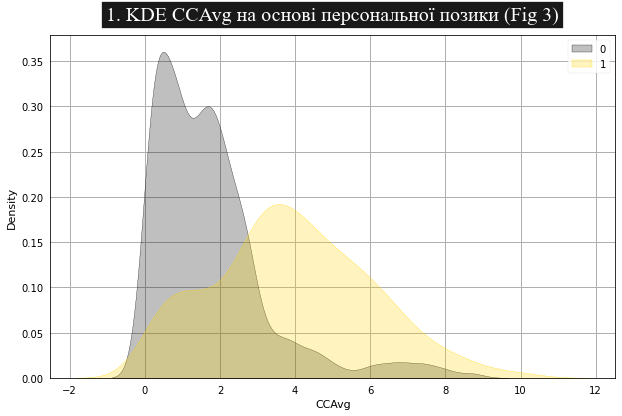

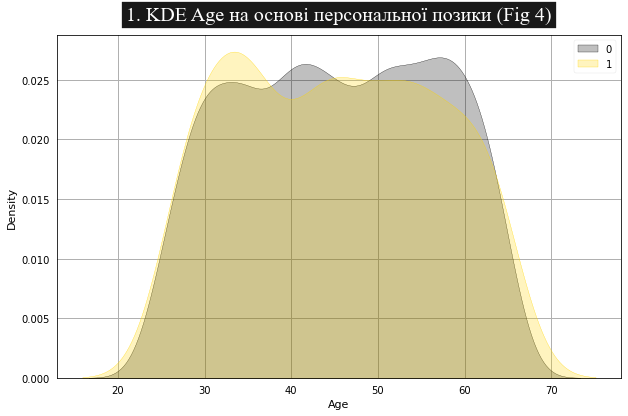

In [22]:
# перевіряємо розподіл доходу (на основі персональної позики)
%matplotlib inline
plt.style.use('seaborn-notebook')
sns.set_palette(['black','gold'])
for j, col in enumerate(['Income','Mortgage','CCAvg','Age']):
    for i, label in enumerate(data['Personal Loan'].unique().tolist()):
        sns.kdeplot(data.loc[data['Personal Loan'] == label, col], label=label, shade=True)
    plt.title(f'1. KDE {col} на основі персональної позики (Fig {j+1})', fontdict=FONT, pad=15)
    plt.legend()
    plt.show()

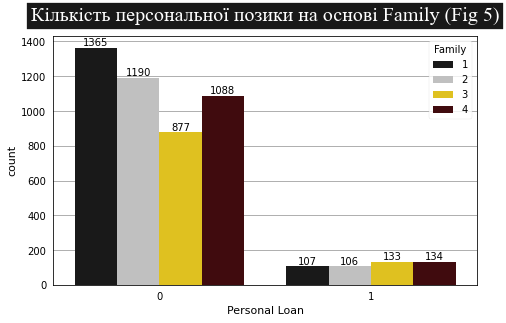

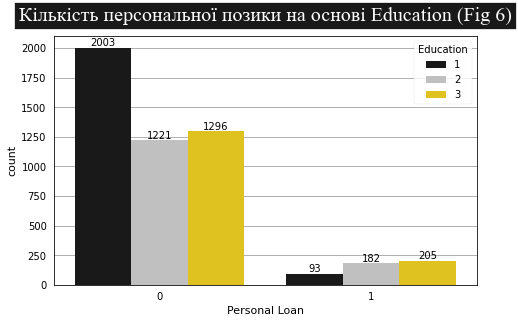

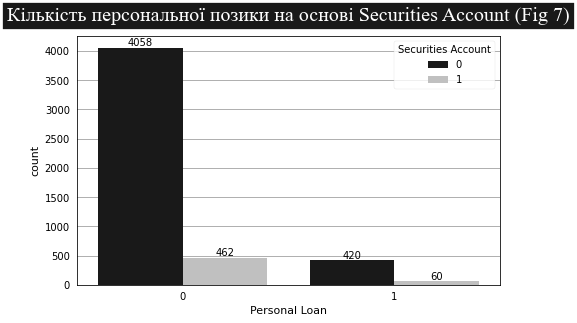

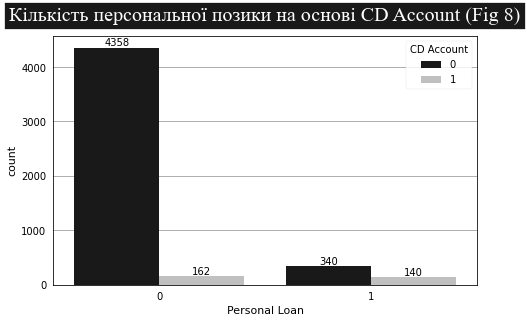

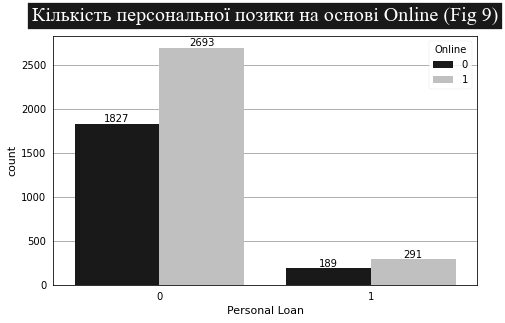

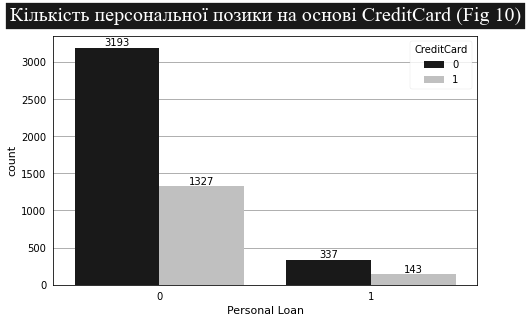

In [23]:
# кількість персональних позик на основі статі
%matplotlib inline
sns.set_palette(['#191919','silver','gold','#490206'])
discrete_cols2 = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for i, col in enumerate(discrete_cols2):
    ax = sns.countplot(data=data, x='Personal Loan', hue=col)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Кількість персональної позики на основі {col} (Fig {i+5})', fontdict=FONT, pad=15)
    plt.show()

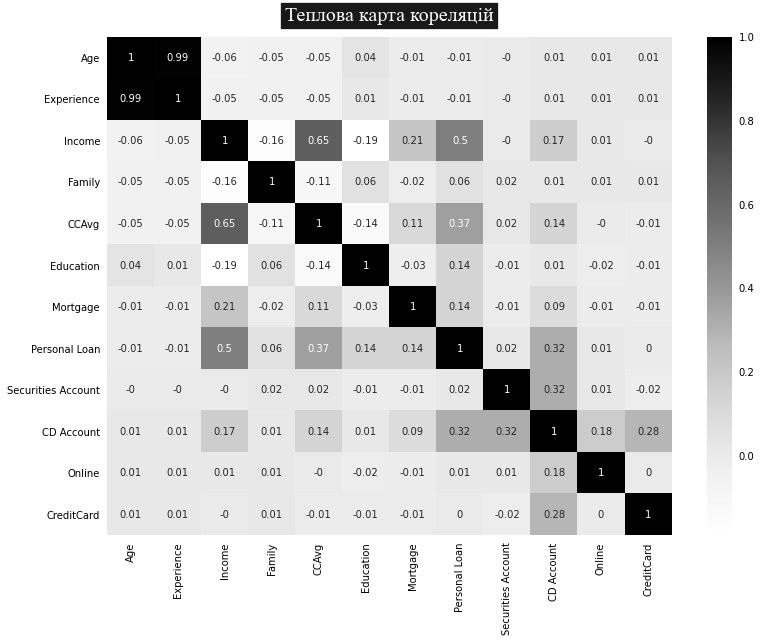

In [24]:
# намалюємо тепловий графік кореляції між стовпцями
plt.figure(figsize=(10,8))
sns.heatmap(round(data.corr(),2), cmap='Greys', annot=True)
plt.title('Теплова карта кореляцій', y=1.02, fontdict=FONT)
plt.show()

In [25]:
data

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [26]:
# визначаємо x і y
x = data.drop('Personal Loan', axis=1)
y = data['Personal Loan'].values.reshape(-1, 1)

In [27]:
Model = []
FPR = []
TPR = []
ACC_test = []
ACC_train = []
Recall = []
Precision = []
F1 = []
AUC = []

def delete_results():
    """Видалаємо результати попередніх моделей, щоб уникнути перевантаження на діаграмах ROC"""
    global FPR, TPR, ACC_test, ACC_train, Recall, Precision, F1, AUC
    del FPR[:]
    del TPR[:]
    del ACC_test[:]
    del ACC_train[:]
    del Recall[:]
    del Precision[:]
    del F1[:]
    del AUC[:]

def plot_confusion_matrix2(cm, classes,
                          title='Матриця невідповідностей',
                          cmap=plt.cm.Blues):
    """
    Ця функція будує графік матрицю невідповідностей.
        cm(array): Матриця невідповідностей
        classes(dictionary): classes of our target (key=categorical type, value=numerical type)
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, [f"{value}={key}" for key , value in classes.items()], rotation=45)
    plt.yticks(tick_marks, [f"{value}={key}" for key , value in classes.items()])
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    thresh = cm.max() / 2.
    for k, (i,j) in enumerate(itertools.product(range(cm.shape[0]), range(cm.shape[1]))):
        plt.text(j, i, f"{names[k]}\n{cm[i,j]}\n{cm[i,j]/np.sum(cm)*100:.2f}%",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------------------------------------

def Perform_cross_val(model, k, x, y, scoring):
    """
   виконуємо перехресну перевірку
        model: модель
        k(scaler): значення для n_splits у KFold()
        x(DataFrame or array):  x_train
        y(DataFrame or array): y_train
        scoring(string): підхід до оцінки в перехресній перевірці
    """

    kf = StratifiedKFold(n_splits=k)
    cv_results = cross_val_score(model, x, y.ravel(), cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)
    
    print('-'*20, f"CV for k={k}, scoring={scoring}", '-'*20)
    print(f"CV mean: {cv_mean}")
    print(f"CV results: {cv_results}\n")

# --------------------------------------------------------------------------------------

def find_fold_index(k, x):
    """
    Знаходимо індекс згину в kfold
        k(scaler): значення, яке використовується для n_splits у KFold()
        x(DataFrame or array): x_train
    """

    my_fold_index = []
    j=1
    for _ , test in KFold(k).split(x):

        my_fold_index = []
        for i in test:
            my_fold_index.append(i)
        print(f"fold {j}: [{my_fold_index[0]},{my_fold_index[-1]}]")
        print(20*'-')
        j += 1

# --------------------------------------------------------------------------------------

def change_test_size(model, x, y, name):
    # try to imporve model by changing test_size
    test_sizes= [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
    acc_table = pd.DataFrame(columns=['Model', 'test_size', 'ACC_train', 'ACC_test', 'Recall_train', 'Recall_test'])
    for i, test_size in enumerate(test_sizes):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0, stratify=y)
        model.fit(x_train, y_train.ravel())
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        acc_test_i = accuracy_score(y_test, y_pred_test)
        acc_train_i = accuracy_score(y_train, y_pred_train)
        rec_test_i = recall_score(y_test, y_pred_test)
        rec_train_i = recall_score(y_train, y_pred_train)
        acc_table.loc[len(acc_table.index)] = [f"{name} {i+1}", str(test_size), acc_train_i, acc_test_i, rec_train_i, rec_test_i]
    return acc_table.sort_values(by=['Recall_test'], ascending=False).style.background_gradient(cmap='bone')

# --------------------------------------------------------------------------------------

def plot_results(FPR, TPR, AUC, ACC_test, ACC_train, Recall, Precision, F1, y_proba_test, y_test, model_name, Model):
    """
    Малюємо криву ROC і графік відкликання, точності, оцінки f1 тощо.
        FPR(list): список хибнопозитивних результатів
        TPR(list): список істинно позитивних показників
        ACC(list): перелік точності моделей
        Recall(list): список балів відкликання моделей
        Precision(list): список оцінок точності моделей
        F1(list): список моделей F1
        classes(dictionary): класи нашої цілі (key=categorical type, value=numerical type)
    """
    fig1 = go.Figure()
    fig2 = go.Figure()
    # зелена лінія вказує де TPR = FPR
    fig1.add_shape(type='line', line=dict(color='green', dash='dash'),x0=0, x1=1, y0=0, y1=1)
    for fpr_i, tpr_i, auc_i, name in zip(FPR, TPR, AUC, Model):
        # ROC крива
        fig1.add_trace(go.Scatter(x=fpr_i, y=tpr_i, name=f"{name} AUC = {auc_i:.4f}", mode='lines'))
    # гістограма балів у порівнянні з справжніми мітками
    fig_hist = px.histogram(x=y_proba_test[:,1], color=y_test.ravel(), nbins=50, labels=dict(color='Personal Loan', x='Probability'))
    fig2.add_trace(fig_hist.data[0])
    fig2.add_trace(fig_hist.data[1])
    # Зменшуємо прозорість, щоб побачити обидві гістограми
    fig2.update_traces(opacity=0.75)

    # Точність плоту
    fig3 = make_subplots(rows=1, cols=2)
    fig3.add_trace(go.Scatter(y=ACC_test, mode='lines+markers', name='ACC test', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)
    fig3.add_trace(go.Scatter(y=Recall, mode='lines+markers', name='Recall', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)
    fig3.add_trace(go.Scatter(y=Precision, mode='lines+markers', name='Precision', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)
    fig3.add_trace(go.Scatter(y=F1, mode='lines+markers', name='F1 score', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)

    fig3.add_trace(go.Scatter(y=ACC_train, mode='lines+markers', name='ACC train', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=2)
    fig3.add_trace(go.Scatter(y=ACC_test, mode='lines+markers', name='ACC test', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=2)

    # оновлюємо лайаут і показуємо риси
    
    fig1.update_layout(
        title= 'ROC curve and AUC score',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=700, height=500,
        showlegend=True)
    fig2.update_layout(
        # showlegend=True, 
        barmode='overlay',  # Накладаємо обидві гістограми
        title='Interpret ROC curve by histogram',
        xaxis_title='Probability',
        yaxis_title='Count')
        
    fig3.update_layout(
        showlegend=True,
        title='Model Evaluation & Train and Test Accuracy)',
        xaxis_title='Model',
        yaxis_title='Evaluation measure')
    # Встановіть спеціальні мітки осі X
    fig3.update_xaxes(ticktext=list(range(1,20)))
    fig1.show()
    fig2.show()
    fig3.show()

# --------------------------------------------------------------------------------------

def modeling(clf, x, y, test_size, classes, model_name, stratify=False):

    # розділяємо дані для навчальних та тестувальних даних
    if stratify:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0, stratify=y)
    else:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    print(20*'-', 'Shape', 20*'-')
    print(f"x_train: {x_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test: {y_test.shape}")

    classes1 = np.unique(y_test)
    total = len(y_test)
    print(15*'-', 'Розподіл класів у y_test', 15*'-')
    for c in classes1:
        n_examples = len(y_test[y_test==c])
        percent = n_examples / total * 100
        print(f"> Class={c:d} : {n_examples:d}/{total:d} ({percent:.1f}%)")
    
    classes1 = np.unique(y_train)
    total = len(y_train)
    print(15*'-', 'Розподіл класів у y_train', 15*'-')
    for c in classes1:
        n_examples = len(y_train[y_train==c])
        percent = n_examples / total * 100
        print(f"> Class={c:d} : {n_examples:d}/{total:d} ({percent:.1f}%)")
    
    # Нормалізація
    # scaler = MinMaxScaler().fit(x_train)
    x_norm_train = x_train
    x_norm_test = x_test
    # визначаємо модель і відповідну модель
    clf.fit(x_train, y_train.ravel())

    # прогноз і результати
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    y_proba_train = clf.predict_proba(x_train)
    y_proba_test = clf.predict_proba(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba_test[:,1])
    roc_auc = auc(fpr, tpr)

    cm = confusion_matrix(y_test, y_pred_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    rec_test = recall_score(y_test, y_pred_test)
    rec_train = recall_score(y_train, y_pred_train)
    pre = precision_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    # додаємо результати
    Model.append(model_name)
    FPR.append(fpr)
    TPR.append(tpr)
    ACC_test.append(acc_test)
    ACC_train.append(acc_train)
    Recall.append(rec_test)
    Precision.append(pre)
    F1.append(f1)
    AUC.append(roc_auc)

    plot_results(FPR, TPR, AUC, ACC_test, ACC_train, Recall, Precision, F1, y_proba_test, y_test, model_name, Model)

    # Модель оцінювання
    print('-'*20 , 'Матриця невідповідностей', '-'*20)
    print(cm)
    plot_confusion_matrix2(cm, classes,
                          title='Матриця невідповідностей',
                          cmap=plt.cm.Blues)

    print('-'*20 , 'Звіт про класифікацію', '-'*20)
    print(classification_report(y_test, y_pred_test, ), '\n')
    print(f"Jaccard Score: {jaccard_score(y_test, y_pred_test)}")
    print(f"Log loss: {log_loss(y_test, y_pred_test)}", '\n')

    # пиишемо інші результати щодо прогнозованих даних
    return acc_test, acc_train, rec_test, rec_train

In [28]:
data.Age.describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

In [29]:
data2 = data.copy()

In [30]:
bin_age = [0, 29, 39, 49, 59, 70]
category_age = ['<30s', '30s', '40s', '50s', '>50s']
data2['Age_binned'] = pd.cut(data['Age'], bins=bin_age, labels=category_age)
data2 = data.drop(['Age'], axis = 1)

In [31]:
data.Experience.describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [32]:
bin_experience = [-1, 9, 19, 29, 39, 50]
category_experience = ['<10s', '10s', '20s', '30s', '>30s']
data2['Experience_binned'] = pd.cut(data2['Experience'], bins=bin_experience, labels=category_experience)
data2 = data2.drop(['Experience'], axis = 1)

In [33]:
data.Income.describe()

count    5000.000000
mean        6.147912
std         3.836233
min         0.670000
25%         3.250000
50%         5.330000
75%         8.170000
max        18.670000
Name: Income, dtype: float64

In [34]:
bin_income = [0, 4, 9, 14, 20]
category_income = ['<5s', '5s', '10s', '10>s']
data2['Income_binned'] = pd.cut(data2['Income'], bins=bin_income, labels=category_income)
data2 = data2.drop(['Income'], axis = 1)

In [35]:
data.CCAvg.describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [36]:
bin_CCAvg = [-1, 1, 3, 5, 7, 10]
category_CCAvg = ['<2s', '2s', '4s', '6s', '>6s']
data2['CCAvg_binned'] = pd.cut(data2['CCAvg'], bins=bin_CCAvg, labels=category_CCAvg)
data2 = data2.drop(['CCAvg'], axis = 1)

In [37]:
data.Mortgage.describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

In [38]:
bin_Mortgage = [-1, 49, 99, 149, 199, 249, 299, 349, 399, 700]
category_Mortgage = ['<50s', '50s', '100s', '150s', '200s', '250s', '300s', '350s', '>350']
data2['Mortgage_binned'] = pd.cut(data2['Mortgage'], bins=bin_Mortgage, labels=category_Mortgage)
data2 = data2.drop(['Mortgage'], axis = 1)

In [39]:
# convert int64 type to category type because we want to use get dummies
data2[data2.select_dtypes('int64').columns] = data2.select_dtypes('int64').astype('category')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Family              5000 non-null   category
 1   Education           5000 non-null   category
 2   Personal Loan       5000 non-null   category
 3   Securities Account  5000 non-null   category
 4   CD Account          5000 non-null   category
 5   Online              5000 non-null   category
 6   CreditCard          5000 non-null   category
 7   Experience_binned   5000 non-null   category
 8   Income_binned       5000 non-null   category
 9   CCAvg_binned        5000 non-null   category
 10  Mortgage_binned     5000 non-null   category
dtypes: category(11)
memory usage: 55.7 KB


In [40]:
data2.isna().sum()

Family                0
Education             0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Experience_binned     0
Income_binned         0
CCAvg_binned          0
Mortgage_binned       0
dtype: int64

In [41]:
data2

Family Education Personal Loan Securities Account CD Account Online  \
0         4         1             0                  1          0      0   
1         3         1             0                  1          0      0   
2         1         1             0                  0          0      0   
3         1         2             0                  0          0      0   
4         4         2             0                  0          0      0   
...     ...       ...           ...                ...        ...    ...   
4995      1         3             0                  0          0      1   
4996      4         1             0                  0          0      1   
4997      2         3             0                  0          0      0   
4998      3         2             0                  0          0      1   
4999      3         1             0                  0          0      1   

     CreditCard Experience_binned Income_binned CCAvg_binned Mortgage_binned  
0             0              <10s            5s           2s            <50s  
1             0               10s           <5s           2s            <50s  
2             0               10s           <5s          <2s            <50s  
3             0              <10s            5s           2s            <50s  
4             1              <10s           <5s          <2s            <50s  
...         ...               ...           ...          ...             ...  
4995          0              <10s           <5s           2s            <50s  
4996          0              <10s           <5s          <2s             50s  
4997          0               30s           <5s          <2s            <50s  
4998          0              >30s            5s          <2s            <50s  
4999          1              <10s            5s          <2s            <50s  

[5000 rows x 11 columns]

In [42]:
data3 = pd.get_dummies(data2.drop('Personal Loan', axis=1))
data3.insert(0, 'Personal Loan', data2['Personal Loan'])
data3 = data3.astype('int64')
data3

Personal Loan  Family_1  Family_2  Family_3  Family_4  Education_1  \
0                 0         0         0         0         1            1   
1                 0         0         0         1         0            1   
2                 0         1         0         0         0            1   
3                 0         1         0         0         0            0   
4                 0         0         0         0         1            0   
...             ...       ...       ...       ...       ...          ...   
4995              0         1         0         0         0            0   
4996              0         0         0         0         1            1   
4997              0         0         1         0         0            0   
4998              0         0         0         1         0            0   
4999              0         0         0         1         0            1   

      Education_2  Education_3  Securities Account_0  Securities Account_1  \
0               0            0                     0                     1   
1               0            0                     0                     1   
2               0            0                     1                     0   
3               1            0                     1                     0   
4               1            0                     1                     0   
...           ...          ...                   ...                   ...   
4995            0            1                     1                     0   
4996            0            0                     1                     0   
4997            0            1                     1                     0   
4998            1            0                     1                     0   
4999            0            0                     1                     0   

      ...  CCAvg_binned_>6s  Mortgage_binned_<50s  Mortgage_binned_50s  \
0     ...                 0                     1                    0   
1     ...                 0                     1                    0   
2     ...                 0                     1                    0   
3     ...                 0                     1                    0   
4     ...                 0                     1                    0   
...   ...               ...                   ...                  ...   
4995  ...                 0                     1                    0   
4996  ...                 0                     0                    1   
4997  ...                 0                     1                    0   
4998  ...                 0                     1                    0   
4999  ...                 0                     1                    0   

      Mortgage_binned_100s  Mortgage_binned_150s  Mortgage_binned_200s  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
4995                     0                     0                     0   
4996                     0                     0                     0   
4997                     0                     0                     0   
4998                     0                     0                     0   
4999                     0                     0                     0   

      Mortgage_binned_250s  Mortgage_binned_300s  Mortgage_binned_350s  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4       

In [43]:
# спочатку визначаємо нові x і y для нового набору даних:
x2 = data3.drop('Personal Loan', axis=1)
y2 = data3[['Personal Loan']].values.reshape(-1,1)

In [44]:
# розділяємо дані га тренувальні та тестові
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=0, stratify=y2)

In [45]:
# Перевіряємо перехресну перевірку моделі CategoricalNB, щоб оцінити продуктивність моделі (точність)
pipe2 = Pipeline([('clf', CategoricalNB())])
Perform_cross_val(pipe2, k=10, x=x_train2, y=y_train2, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.9317499999999999
CV results: [0.9175 0.92   0.9525 0.9    0.9325 0.9375 0.9275 0.9325 0.9475 0.95  ]



In [46]:
# Перевіряємо перехресну перевірку моделі CategoricalNB, щоб оцінити продуктивність моделі (recall)
Perform_cross_val(pipe2, k=10, x=x_train2, y=y_train2, scoring='recall')

-------------------- CV for k=10, scoring=recall --------------------
CV mean: 0.6713900134952766
CV results: [0.5        0.68421053 0.76315789 0.60526316 0.63157895 0.65789474
 0.66666667 0.64102564 0.76923077 0.79487179]



-------------------- Shape --------------------
x_train: (4000, 38)
y_train: (4000, 1)
x_test: (1000, 38)
y_test: (1000, 1)
--------------- Розподіл класів у y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Розподіл класів у y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Матриця невідповідностей --------------------
[[866  38]
 [ 28  68]]


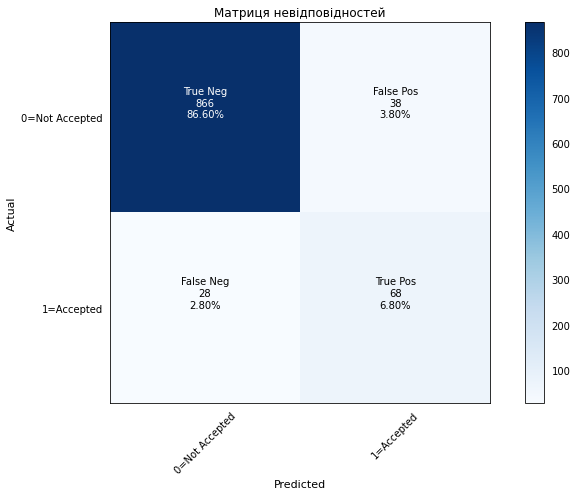

-------------------- Звіт про класифікацію --------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       904
           1       0.64      0.71      0.67        96

    accuracy                           0.93      1000
   macro avg       0.81      0.83      0.82      1000
weighted avg       0.94      0.93      0.94      1000
 

Jaccard Score: 0.5074626865671642
Log loss: 2.279589626766453 



In [47]:
# створюємо початкову модель за допомогою CategoricalNB
acc_test_2_1, acc_train_2_1, rec_test_2_1, rec_train_2_1 = modeling(
    clf=pipe2,
    x=x2,
    y=y2,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='CategoricalNB 1',
    stratify=True)

In [48]:
# перевіряємо чи можна покращити модель, змінивши test_size
change_test_size(pipe2, x2, y2, 'CategoricalNB')

In [49]:
# створуємо Dataframe де ми зберігаємо найкращі моделі для кожного алгоритму
best_model_test = pd.DataFrame({'Model':[], 'test_size':[], 'Test_Accuracy':[], 'Test_Recall':[]})
best_model_train = pd.DataFrame({'Model':[], 'test_size':[], 'Train_Accuracy':[], 'Train_Recall':[]})

# додаємо найкращу модель
best_model_test.loc[len(best_model_test.index)] = [f"CategoricalNB", '0.2', acc_test_2_1, rec_test_2_1]
best_model_train.loc[len(best_model_train.index)] = [f"CategoricalNB", '0.2', acc_train_2_1, rec_train_2_1]

In [50]:
# розділяємо тренувальні та тестові дані 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [51]:
# Перевіряємо перехресну перевірку моделі LogisticRegression, щоб оцінити ефективність моделі (точність)
logreg = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(solver='newton-cg'))])
Perform_cross_val(logreg, k=10, x=x_train, y=y_train, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.9512499999999999
CV results: [0.9475 0.9525 0.9525 0.945  0.955  0.9525 0.9475 0.95   0.96   0.95  ]



In [52]:
# Перевіряємо перехресну перевірку моделі LogisticRegression для оцінки ефективності моделі (recall)
Perform_cross_val(logreg, k=10, x=x_train, y=y_train, scoring='recall')

-------------------- CV for k=10, scoring=recall --------------------
CV mean: 0.6303643724696357
CV results: [0.60526316 0.63157895 0.68421053 0.63157895 0.68421053 0.60526316
 0.58974359 0.58974359 0.66666667 0.61538462]



-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Розподіл класів у y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Розподіл класів у y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Матриця невідповідностей --------------------
[[892  12]
 [ 36  60]]


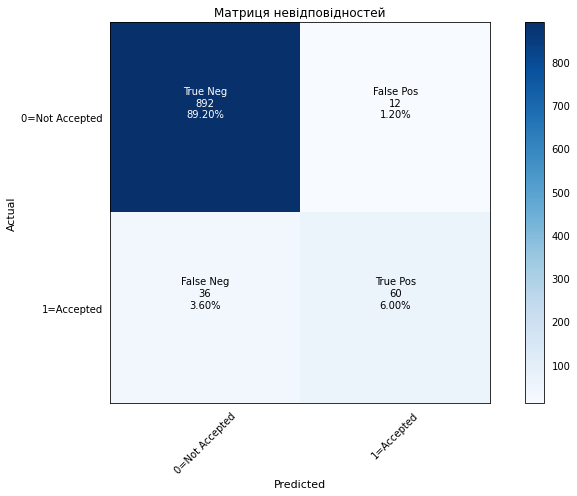

-------------------- Звіт про класифікацію --------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.83      0.62      0.71        96

    accuracy                           0.95      1000
   macro avg       0.90      0.81      0.84      1000
weighted avg       0.95      0.95      0.95      1000
 

Jaccard Score: 0.5555555555555556
Log loss: 1.6578708621248757 



In [53]:
# створюємо початкову модель з LogisticRegression і test_size=0,2
acc_test_5_1, acc_train_5_1, rec_test_5_1, rec_train_5_1 = modeling(
    clf=logreg,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='LogisticReg 1',
    stratify=True)

In [54]:
print(f"Recall train: {rec_train_5_1}")
print(f"Recall test: {rec_test_5_1}")

Recall train: 0.6328125
Recall test: 0.625


In [55]:
# спробуємо покращити модель, змінивши test_size
pipe5_1 = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())])
change_test_size(pipe5_1, x, y, 'LogisticReg')

In [56]:
# знаходимо найкращі параметри для оцінювання логістичної регресії
# визначаємо моделі та параметри
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l2', 'l1']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
scaler = StandardScaler().fit(x_train)
x_norm_train = scaler.transform(x_train)
x_norm_test = scaler.transform(x_test)
grid_result = grid_search.fit(x_norm_train, y_train.ravel())
# підводимо підсумки
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")

Best: 0.6251012145748989 using {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.0 (0.0) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'none', 'solver': 'sag'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'none', 'solver': 'saga'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'l2', 'solver

-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Розподіл класів у y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Розподіл класів у y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Матриця невідповідностей --------------------
[[892  12]
 [ 35  61]]


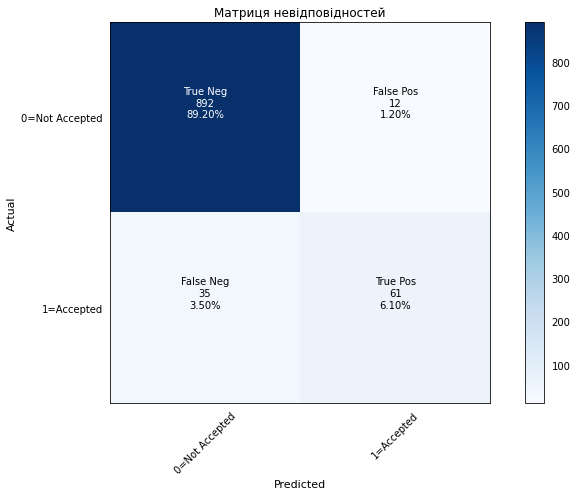

-------------------- Звіт про класифікацію --------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.84      0.64      0.72        96

    accuracy                           0.95      1000
   macro avg       0.90      0.81      0.85      1000
weighted avg       0.95      0.95      0.95      1000
 

Jaccard Score: 0.5648148148148148
Log loss: 1.623332085729965 



In [59]:
# create better LogisticRegression model
logreg2 = LogisticRegression(solver='liblinear', penalty='l1', C=1, n_jobs=-1)
pipe5_2 = Pipeline([('scaler', StandardScaler()), ('clf', logreg2)])
acc_test_5_2, acc_train_5_2, rec_test_5_2, rec_train_5_2 = modeling(
    clf=pipe5_2,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='LogisticReg 2',
    stratify=True)

In [60]:
print(f"Recall train: {rec_train_5_2}")
print(f"Recall test: {rec_test_5_2}")

Recall train: 0.6328125
Recall test: 0.6354166666666666


In [61]:
# перевіряємо чи можна покращити модель, змінивши test_size
change_test_size(pipe5_2, x, y, 'LogisticReg')

In [62]:
# додаємо найкращу модель
best_model_test.loc[len(best_model_test.index)] = [f"LogisticReg", '0.2', acc_test_5_2, rec_test_5_2]
best_model_train.loc[len(best_model_train.index)] = [f"LogisticReg", '0.2', acc_train_5_2, rec_train_5_2]

In [63]:
data

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [64]:
# Робимо перехресну перевірку моделі DT, щоб оцінити продуктивність моделі (точність)
operations = [('DTs', DecisionTreeClassifier(max_depth=3))]
pipe7_1 = Pipeline(operations)
Perform_cross_val(pipe7_1, k=10, x=x_train, y=y_train, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.9814999999999999
CV results: [0.9725 0.9875 0.9775 0.9825 0.98   0.9775 0.985  0.9825 0.985  0.985 ]



In [65]:
# Робимо перехресну перевірку моделі DT, щоб оцінити продуктивність моделі (Recall)
Perform_cross_val(pipe7_1, k=10, x=x_train, y=y_train, scoring='recall')

-------------------- CV for k=10, scoring=recall --------------------
CV mean: 0.8383265856950066
CV results: [0.78947368 0.86842105 0.84210526 0.86842105 0.78947368 0.78947368
 0.87179487 0.82051282 0.84615385 0.8974359 ]



-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Розподіл класів у y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Розподіл класів у y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Матриця невідповідностей --------------------
[[900   4]
 [ 10  86]]


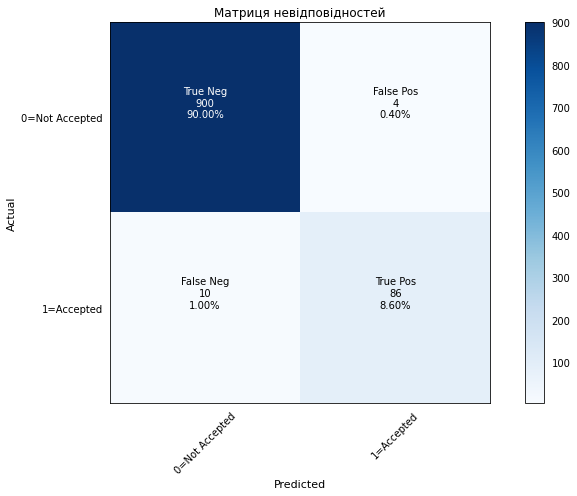

-------------------- Звіт про класифікацію --------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.96      0.90      0.92        96

    accuracy                           0.99      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000
 

Jaccard Score: 0.86
Log loss: 0.48354606791847127 



In [66]:
# створити початкову модель DTs
dts = DecisionTreeClassifier(random_state=0)
pipe7_1 = Pipeline([('scaler', StandardScaler()), ('clf', dts)])
acc_test_7_1, acc_train_7_1, rec_test_7_1, rec_train_7_1 = modeling(
    clf=pipe7_1,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='DT 1',
    stratify=True)

In [67]:
print(f"Train Accuracy: {acc_train_7_1}")
print(f"Test Accuracy: {acc_test_7_1}")
print(f"Train Recall: {rec_train_7_1}")
print(f"Test Recall: {rec_test_7_1}")

Train Accuracy: 1.0
Test Accuracy: 0.986
Train Recall: 1.0
Test Recall: 0.8958333333333334


In [68]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train.ravel())
y_train_predicted=clf.predict(x_train)
y_test_predicted=clf.predict(x_test)
print(f"Train Accuracy: {accuracy_score(y_train,y_train_predicted)}")
print(f"Test Accuracy: {accuracy_score(y_test,y_test_predicted)}")
print(f"Train Recall: {recall_score(y_train,y_train_predicted)}")
print(f"Test Recall: {recall_score(y_test,y_test_predicted)}")

Train Accuracy: 1.0
Test Accuracy: 0.986
Train Recall: 1.0
Test Recall: 0.8958333333333334


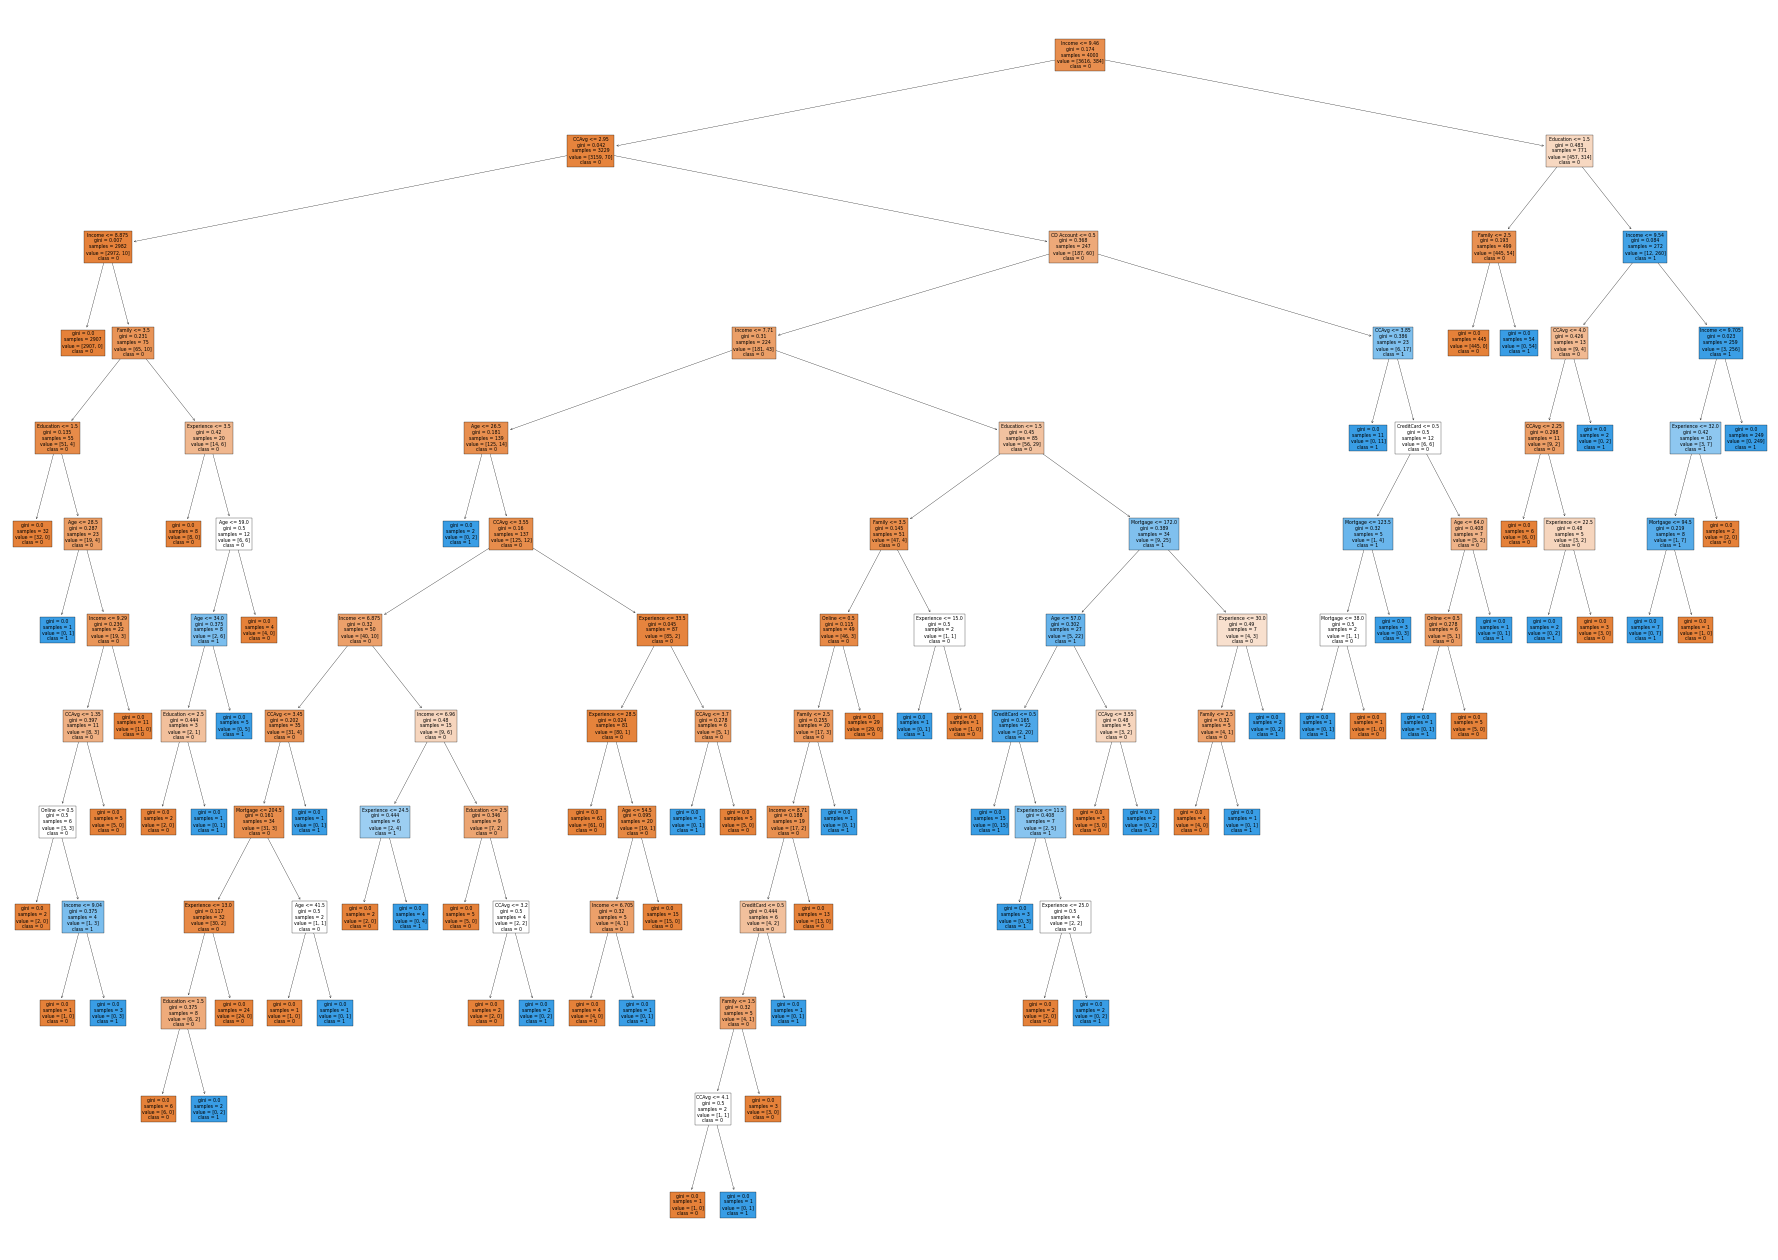

In [69]:
# visualizing tree
from sklearn import tree
feature_names = x.columns
target_names = ['0', '1']
fig = plt.figure(figsize=(25,20))
dt1 = DecisionTreeClassifier(random_state=0)
dt1.fit(x_train,y_train.ravel())
plot = tree.plot_tree(
    dt1,
    feature_names = feature_names,
    class_names = target_names,
    filled=True)
plt.show()

In [70]:
# Grid of parameters to choose from
grid_param={"criterion":["gini","entropy"],
             "max_depth":range(2,10,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
cv = StratifiedKFold(n_splits=10)
grid_search=GridSearchCV(estimator=dt1,param_grid=grid_param,cv=cv,n_jobs=-1)
grid_search.fit(x_train,y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20)})

In [71]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 14, 'min_samples_split': 2}


In [72]:
dt2=DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=14,
    min_samples_split=2,
    splitter='random'
    )
dt2.fit(x_train,y_train.ravel())
plt.figure(figsize=(20,12), dpi=1000)
plot = tree.plot_tree(
    dt2,
    feature_names = feature_names,
    class_names = target_names,
    filled=True)
plt.show()

In [73]:
# перевірка точності, recall та перенавчання
y_predicted_train= dt2.predict(x_train)
y_predicted_test = dt2.predict(x_test)
print(f"Train Accuracy: {accuracy_score(y_train, y_predicted_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predicted_test)}")
print(f"Train Recall: {recall_score(y_train, y_predicted_train)}")
print(f"Test Recall: {recall_score(y_test, y_predicted_test)}")

Train Accuracy: 0.969
Test Accuracy: 0.965
Train Recall: 0.7369791666666666
Test Recall: 0.7395833333333334


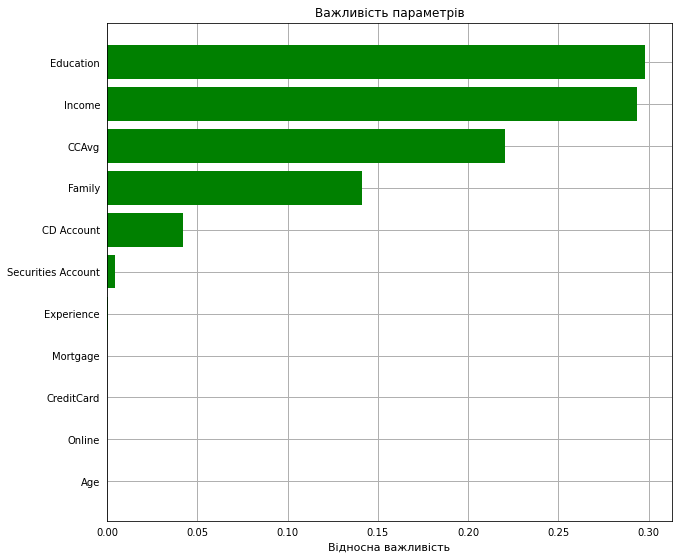

In [74]:
importances = dt2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Важливість параметрів')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Відносна важливість')
plt.show()

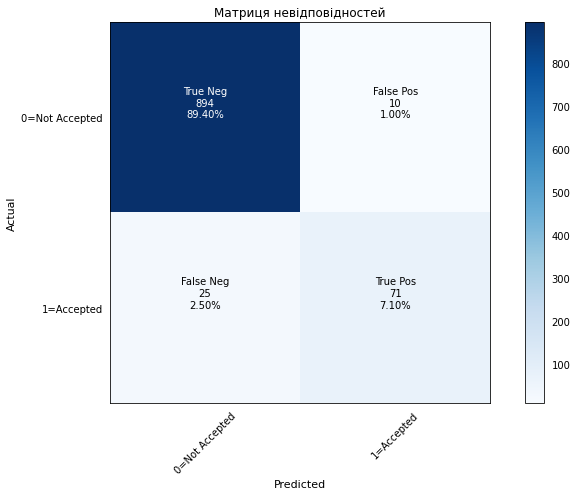

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       904
           1       0.88      0.74      0.80        96

    accuracy                           0.96      1000
   macro avg       0.92      0.86      0.89      1000
weighted avg       0.96      0.96      0.96      1000



In [75]:
cm = confusion_matrix(y_test, y_predicted_test)
plot_confusion_matrix2(cm=cm, classes={'Not Accepted':0, 'Accepted':1}, )
print(classification_report(y_test, y_predicted_test))

In [76]:
path = dt1.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print("ccp alpha wil give list of values :",ccp_alphas)
print("\n")
print("Impurities in Decision Tree :",impurities)

ccp alpha wil give list of values : [0.         0.00016461 0.0002     0.0002     0.00024052 0.00024159
 0.00025    0.00030303 0.00030909 0.00033333 0.00035714 0.00037255
 0.00038571 0.00038889 0.0004     0.00040378 0.00040909 0.00041667
 0.0004375  0.00045714 0.0004836  0.00049744 0.0005142  0.00052256
 0.00056643 0.00057626 0.0006499  0.00071739 0.00082051 0.00286805
 0.00296292 0.00312239 0.00654547 0.02407816 0.05475665]


Impurities in Decision Tree : [0.         0.00049383 0.00089383 0.00129383 0.00273696 0.00322015
 0.00347015 0.00437924 0.00623379 0.00656712 0.0072814  0.00839905
 0.00878477 0.00956254 0.00996254 0.01036632 0.01118451 0.01160117
 0.01203867 0.01249582 0.01394661 0.01444405 0.01598664 0.01703177
 0.0175982  0.01932699 0.01997689 0.02069428 0.02151479 0.02438284
 0.03030869 0.03343108 0.03997655 0.0640547  0.173568  ]


In [77]:
# навчити дерево рішень за допомогою ефективних alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train.ravel())
    clfs.append(clf)
print(
    "Кількість вузлів в останньому дереві: {} з ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Кількість вузлів в останньому дереві: 1 з ccp_alpha: 0.054756649204188663


In [78]:
# Візуалізація Recall score для тренувальних та тестових данів:

train_scores = [recall_score(y_train, clf.predict(x_train)) for clf in clfs]
test_scores = [recall_score(y_test, clf.predict(x_test)) for clf in clfs]

fig = go.Figure()
fig.add_trace(go.Scatter(x=ccp_alphas, y=train_scores, name='Train Recall', mode='lines+markers', line={"shape": 'hv'}))
fig.add_trace(go.Scatter(x=ccp_alphas, y=test_scores, name='Test Recall', mode='lines+markers', line={"shape": 'hv'}))
fig.update_layout(
    xaxis_title='ccp_alphas',
    yaxis_title='Recall',
    title='Recall vs alpha for training and testing sets',
    template='seaborn')
fig.show()

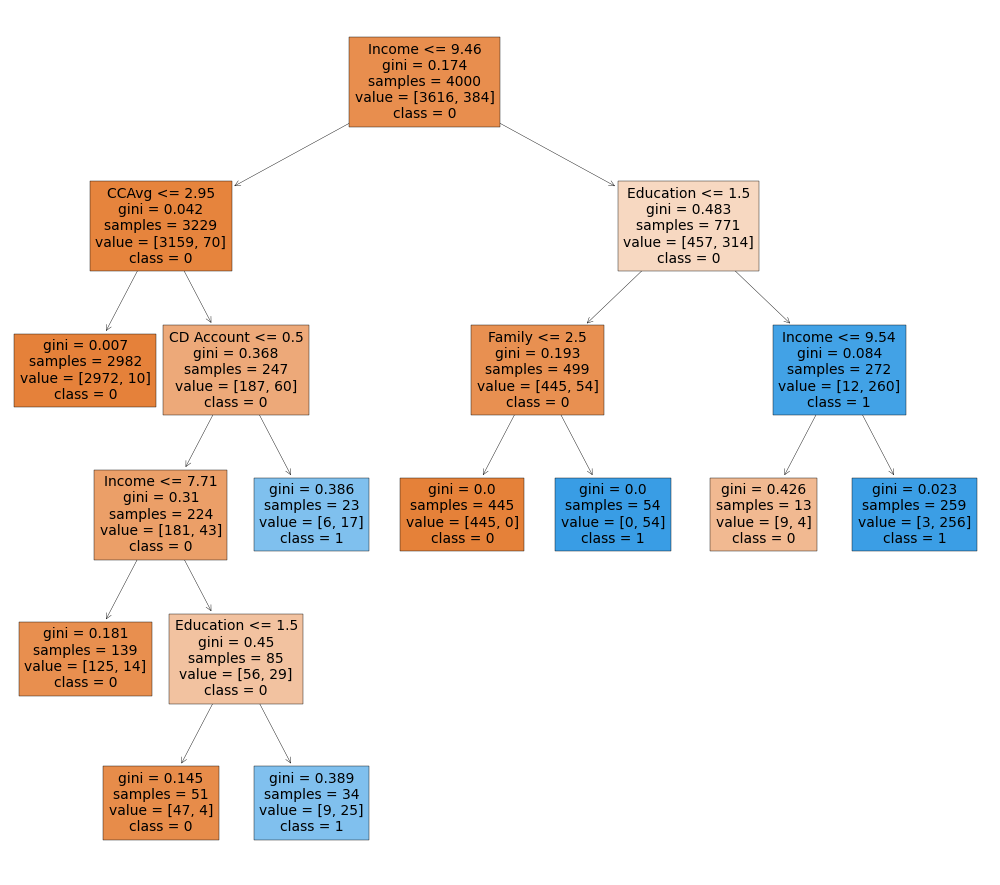

In [79]:
# створюємо краще дерево рішень (Post_pruning)
dt3 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.002868053)
dt3.fit(x_train,y_train.ravel())
fig = plt.figure(figsize=(10,10), dpi=100)
plot = tree.plot_tree(
    dt3,
    feature_names = feature_names,
    class_names = target_names,
    filled=True)

plt.show()

In [80]:
# print results for check overfit
y_predicted_train= dt3.predict(x_train)
y_predicted_test = dt3.predict(x_test)
print(f"Train Accuracy: {accuracy_score(y_train, y_predicted_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predicted_test)}")
print(f"Train Recall: {recall_score(y_train, y_predicted_train)}")
print(f"Test Recall: {recall_score(y_test, y_predicted_test)}")

Train Accuracy: 0.9875
Test Accuracy: 0.985
Train Recall: 0.9166666666666666
Test Recall: 0.9166666666666666


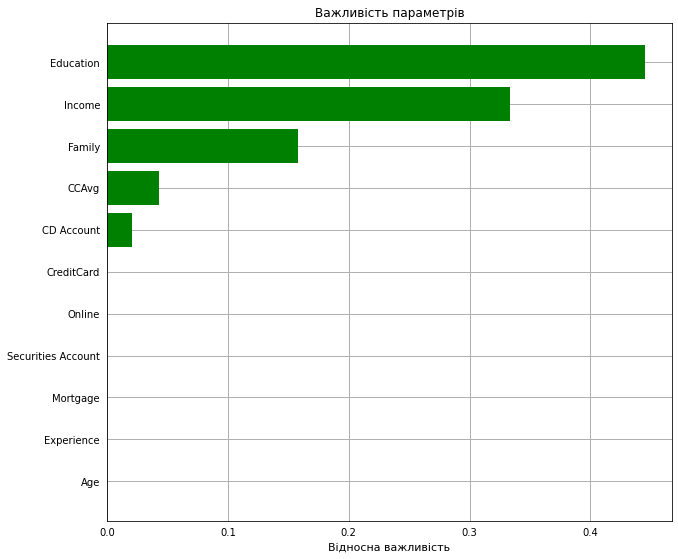

In [81]:
# знайти важливі параметри
importances = dt3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Важливість параметрів')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Відносна важливість')
plt.show()

-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Розподіл класів у y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Розподіл класів у y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Матриця невідповідностей --------------------
[[897   7]
 [  8  88]]


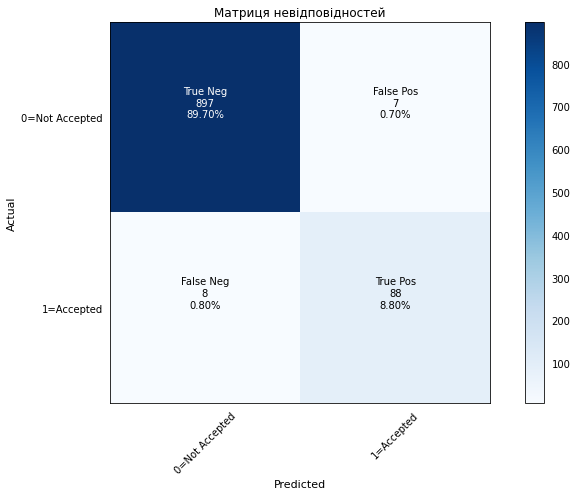

-------------------- Звіт про класифікацію --------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.93      0.92      0.92        96

    accuracy                           0.98      1000
   macro avg       0.96      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000
 

Jaccard Score: 0.8543689320388349
Log loss: 0.5180872431056726 



In [82]:
# створюємо кращу модель DT і малюємо графіки
pipe7_2 = Pipeline([('scaler', StandardScaler()), ('clf', dt3)])
acc_test_7_2, acc_train_7_2, rec_test_7_2, rec_train_7_2 = modeling(
    clf=pipe7_2,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='DT 2',
    stratify=True)

In [83]:
# перевіряємо чи можна покращити модель, змінивши test_size
change_test_size(pipe7_2, x, y, 'DT')

In [84]:
# додати найкращу модель і її точність і відкликати
best_model_test.loc[len(best_model_test.index)] = [f"Decision Tree", '0.2', acc_test_7_2, rec_test_7_2]
best_model_train.loc[len(best_model_train.index)] = [f"Decision Tree", '0.2', acc_train_7_2, rec_train_7_2]

In [85]:
# таблиця кращих моделей
best_model_test.sort_values(by=['Test_Recall'], ascending=False).reset_index(drop=True).style.background_gradient(cmap='bone')

In [86]:
# fit final model on all of data (train + test)
final_model = pipe7_2

# define sample data
sample = pd.DataFrame({'Age':[20], 'Experience':[1], 'Income':[20/12], 'Family':[1], 'CCAvg':[1.2], 'Education':[2], 'Mortgage':[0], 'Securities Account':[1], 'CD Account':[0], 'Online':[1], 'CreditCard':[1],})
print(f"Age: {sample['Age'].values[0]}\n"
      f"Experience: {sample['Experience'].values[0]}\n"
      f"Income: {sample['Income'].values[0]}\n"
      f"Family: {sample['Family'].values[0]}\n"
      f"CCAvg: {sample['CCAvg'].values[0]}\n"
      f"Education: {sample['Education'].values[0]}\n"
      f"Mortgage: {sample['Mortgage'].values[0]}\n"
      f"Securities Account: {sample['Securities Account'].values[0]}\n"
      f"CD Account: {sample['CD Account'].values[0]}\n"
      f"Online: {sample['Online'].values[0]}\n"
      f"CreditCard: {sample['CreditCard'].values[0]}\n")

# predict sample data
result = final_model.predict(sample)

print('='*38)
print(f"Predict whether the customer will accept a personal loan? (0:No & 1:Yes): {result}")

Age: 20
Experience: 1
Income: 1.6666666666666667
Family: 1
CCAvg: 1.2
Education: 2
Mortgage: 0
Securities Account: 1
CD Account: 0
Online: 1
CreditCard: 1

Predict whether the customer will accept a personal loan? (0:No & 1:Yes): [0]
